In [1]:
import gc
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import mlxtend.preprocessing
import mlxtend.frequent_patterns

In [2]:
ls

market_basket_analysis.ipynb  online_retail.xlsx


In [3]:
df=pd.read_excel('online_retail.xlsx')

In [4]:
df.shape

(525461, 8)

In [5]:
#To check if there is any integer/string value in a specific column
df['Description'].map(type).eq(int).any()

True

In [6]:
#some of the descriptions have spaces that need to be removed. 
#We’ll also drop the rows that don’t have invoice numbers and remove the credit transactions 
#(those with invoice numbers containing C).
df['Description']=df['Description'].astype(str)
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['Invoice'], inplace=True)
df['Invoice'] = df['Invoice'].astype('str')
df = df[~df['Invoice'].str.contains('C')]


In [7]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [8]:
'''
Filter out all transactions having either zero or a negative number of items.
Remove all invoice numbers starting with 'C' (using columns 'Is_C_Present').
Subset the dataframe down to 'InvoiceNo' and 'Descritpion'.
Drop all rows with at least one missing value.
'''


df_clean = (
    df
    # filter out non-positive quantity values
    .loc[df["Quantity"] > 0]
    # column filtering
    .loc[:, ["Invoice", "Description"]]
    # dropping all rows with at least one missing value
    .dropna()
)


In [9]:
print(
    "Data dimension (row count, col count): {dim}"
    .format(dim=df_clean.shape)
)
print(
    "Count of unique invoice numbers: {cnt}"
    .format(cnt=df_clean.Invoice.nunique())
)

Data dimension (row count, col count): (513134, 2)
Count of unique invoice numbers: 22103


In [10]:
'''
Transform the data into a list of lists called invoice_item_list

'''

invoice_item_list = []
for num in list(set(df_clean.Invoice.tolist())):
    # filter data set down to one invoice number
    tmp_df = df_clean.loc[df_clean['Invoice'] == num]
    # extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # append list invoice_item_list
    invoice_item_list.append(tmp_items)

print(invoice_item_list[1:3])


[['YULETIDE IMAGES GIFT WRAP SET', 'WICKER WREATH LARGE', 'VINTAGE SNAP CARDS', 'TABLE LAMP WHITE SHADE WOOD BASE', 'SMALL FOLKART STAR CHRISTMAS DEC', 'SMALLFOLKART BAUBLE CHRISTMAS DEC', 'SMALL HANGING GLASS+ZINC LANTERN', 'SET/3 CHRISTMAS DECOUPAGE CANDLES', 'S/15 SILVER GLASS BAUBLES IN BAG', 'GROW YOUR OWN PLANT IN A CAN', 'PINK/WHITE CHRISTMAS TREE 60CM', 'GREEN CHRISTMAS TREE STRING 20LIGHT', 'EUCALYPTUS & PINECONE  WREATH', 'CHRISTMAS PUDDING TRINKET POT', 'BLACK CHRISTMAS TREE 60CM', 'JUMBO  BAG BAROQUE BLACK WHITE', '60 CAKE CASES VINTAGE CHRISTMAS', '15CM CHRISTMAS GLASS BALL 20 LIGHTS'], ['FELTCRAFT CUSHION RABBIT', 'FELTCRAFT PRINCESS LOLA DOLL', 'FELTCRAFT CUSHION BUTTERFLY', 'BLACK HEART CARD HOLDER', 'EDWARDIAN PARASOL RED', 'RED HANGING HEART T-LIGHT HOLDER', 'GUMBALL COAT RACK', 'WHITE HANGING HEART T-LIGHT HOLDER', 'NOEL WOODEN BLOCK LETTERS', 'CHRISTMAS TOILET ROLL', 'PACK 3 BOXES CHRISTMAS PANNETONE', 'HAND WARMER OWL DESIGN', 'HAND WARMER SCOTTY DOG DESIGN', 'HAND

In [11]:
# Initialize and fit the transaction encoder
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)



In [12]:
# Recast the encoded array as a dataframe
online_encoder_df = pd.DataFrame(online_encoder_array, columns=online_encoder.columns_)

# Print the results
online_encoder_df


,*Boombox Ipod Classic,*USB Office Glitter Lamp,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,...,eurobargain invc/credit,found,found again,mailout,mailout addition,nan,temp,tk maxx mix up with pink,update,wrong invc
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22098,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22099,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22101,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
'''
Run the Apriori Algorithm with min_support = 0.01 (by default 0.5)
'''

apriori_model = mlxtend.frequent_patterns.apriori(online_encoder_df, min_support=0.01)
apriori_model


,support,itemsets
0,0.013166,(3)
1,0.014704,(12)
2,0.016649,(15)
3,0.022395,(16)
4,0.011673,(19)
...,...,...
1001,0.012849,"(4320, 4027, 3989)"
1002,0.014161,"(4320, 4400, 4405)"
1003,0.010180,"(4400, 4387, 4382)"
1004,0.010632,"(4400, 4405, 4382)"


In [14]:
'''
Run the same model again, but this time with use_colnames=True.
This will replace the numerical designations with the actual item names.
'''

apriori_model_colnames = mlxtend.frequent_patterns.apriori(
    online_encoder_df, 
    min_support=0.01,
    use_colnames=True
)

apriori_model_colnames

,support,itemsets
0,0.013166,(10 COLOUR SPACEBOY PEN)
1,0.014704,(12 PENCIL SMALL TUBE WOODLAND)
2,0.016649,(12 PENCILS SMALL TUBE RED SPOTTY)
3,0.022395,(12 PENCILS SMALL TUBE SKULL)
4,0.011673,(12 PENCILS TALL TUBE RED SPOTTY)
...,...,...
1001,0.012849,"(SWEETHEART CERAMIC TRINKET BOX, STRAWBERRY CE..."
1002,0.014161,"(WOODEN FRAME ANTIQUE WHITE, WOODEN PICTURE FR..."
1003,0.010180,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN FR..."
1004,0.010632,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN FR..."


In [15]:
'''
Add an additional column to the output of apriori_model_colnames that contains the size of the item set.
This will help with filtering and further analysis. 
'''

apriori_model_colnames['length'] = (
    apriori_model_colnames['itemsets'].apply(lambda x: len(x))
)

apriori_model_colnames

,support,itemsets,length
0,0.013166,(10 COLOUR SPACEBOY PEN),1
1,0.014704,(12 PENCIL SMALL TUBE WOODLAND),1
2,0.016649,(12 PENCILS SMALL TUBE RED SPOTTY),1
3,0.022395,(12 PENCILS SMALL TUBE SKULL),1
4,0.011673,(12 PENCILS TALL TUBE RED SPOTTY),1
...,...,...,...
1001,0.012849,"(SWEETHEART CERAMIC TRINKET BOX, STRAWBERRY CE...",3
1002,0.014161,"(WOODEN FRAME ANTIQUE WHITE, WOODEN PICTURE FR...",3
1003,0.010180,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN FR...",3
1004,0.010632,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN FR...",3


In [16]:
apriori_model_colnames[
    (apriori_model_colnames['length'] == 2) & 
    (apriori_model_colnames['support'] >= 0.02) &
    (apriori_model_colnames['support'] < 0.021)
]


,support,itemsets,length
828,0.020495,"(JUMBO BAG STRAWBERRY, JUMBO STORAGE BAG SUKI)",2
853,0.020812,"(LOVE BUILDING BLOCK WORD, WHITE HANGING HEART...",2
857,0.020314,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED SPOTTY)",2
973,0.020088,"(VINTAGE SNAP CARDS, VINTAGE HEADS AND TAILS C...",2
980,0.020676,"(WOODEN PICTURE FRAME WHITE FINISH, WHITE HANG...",2


Text(0.5, 1.0, 'Support')

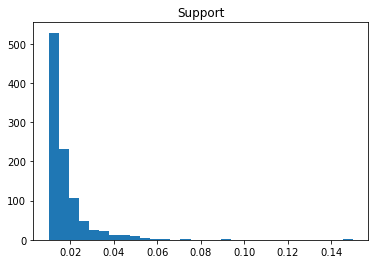

In [17]:
apriori_model_colnames.hist("support", grid=False, bins=30)
plt.title("Support")

In [18]:
'''
Generate derive association rules for the online retail dataset.
Here we use confidence as the measure of interestingness.
Set the minimum threshold to 0.6.
Return all metrics, not just support.
'''

rules = mlxtend.frequent_patterns.association_rules(
    apriori_model_colnames, 
    metric="confidence",
    min_threshold=0.6, 
    support_only=False
)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.015699,0.016152,0.010451,0.665706,41.215969,0.010198,2.943064,0.991300
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.016152,0.015699,0.010451,0.647059,41.215969,0.010198,2.788852,0.991756
2,(PAINTED METAL PEARS ASSORTED),(ASSORTED COLOUR BIRD ORNAMENT),0.017328,0.063928,0.012713,0.733681,11.476689,0.011605,3.514859,0.928964
3,(KITCHEN METAL SIGN),(BATHROOM METAL SIGN),0.018550,0.038728,0.013844,0.746341,19.271478,0.013126,3.789631,0.966029
4,(TOILET METAL SIGN),(BATHROOM METAL SIGN),0.023571,0.038728,0.017780,0.754319,19.477458,0.016868,3.912678,0.971560
...,...,...,...,...,...,...,...,...,...,...
68,"(WOODEN FRAME ANTIQUE WHITE, WOOD S/3 CABINET ...",(WOOD 2 DRAWER CABINET WHITE FINISH),0.014794,0.027960,0.010180,0.688073,24.609201,0.009766,3.116246,0.973771
69,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN FR...",(WOODEN PICTURE FRAME WHITE FINISH),0.013799,0.042845,0.010632,0.770492,17.983295,0.010041,4.170462,0.957607
70,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN PI...",(WOODEN FRAME ANTIQUE WHITE),0.013075,0.051577,0.010632,0.813149,15.765814,0.009958,5.075821,0.948980
71,"(WOOD S/3 CABINET ANT WHITE FINISH, WOODEN PIC...",(WOODEN FRAME ANTIQUE WHITE),0.012170,0.051577,0.010361,0.851301,16.505534,0.009733,6.378147,0.950988


In [19]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 73


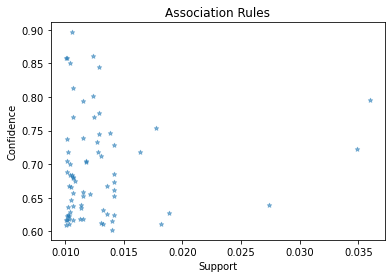

In [20]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()


In [25]:
frequent_itemsets=apriori_model_colnames

In [26]:
#Find top selling items with minimum support of 2 %
# sorting the dataframe
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets

,support,itemsets,length
633,0.150025,(WHITE HANGING HEART T-LIGHT HOLDER),1
476,0.091390,(REGENCY CAKESTAND 3 TIER),1
577,0.074198,(STRAWBERRY CERAMIC TRINKET BOX),1
34,0.063928,(ASSORTED COLOUR BIRD ORNAMENT),1
373,0.063792,(PACK OF 72 RETRO SPOT CAKE CASES),1
...,...,...,...
220,0.010044,(GLASS JAR ENGLISH CONFECTIONERY),1
716,0.010044,"(CHARLOTTE BAG , PINK/WHITE SPOTS, RED SPOTTY ...",2
204,0.010044,(FRYING PAN PINK POLKADOT),1
454,0.010044,(RED RETROSPOT TEA CUP AND SAUCER),1


In [27]:
# finding top 5 items with minimum support of 2%
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.02) ][0:5]

,support,itemsets,length
633,0.150025,(WHITE HANGING HEART T-LIGHT HOLDER),1
476,0.091390,(REGENCY CAKESTAND 3 TIER),1
577,0.074198,(STRAWBERRY CERAMIC TRINKET BOX),1
34,0.063928,(ASSORTED COLOUR BIRD ORNAMENT),1
373,0.063792,(PACK OF 72 RETRO SPOT CAKE CASES),1


In [28]:
# finding itemsets having length more than 1 and minimum support of 5%
frequent_itemsets[(frequent_itemsets['length'] > 1) & 
                  (frequent_itemsets['support'] >= 0.05)]

,support,itemsets,length


In [29]:
# finding itemsets having length 2 and minimum support of 2%
frequent_itemsets[(frequent_itemsets['length'] == 2) & 
                  (frequent_itemsets['support'] >= 0.02)]

,support,itemsets,length
966,0.036013,"(SWEETHEART CERAMIC TRINKET BOX, STRAWBERRY CE...",2
943,0.034882,"(RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI...",2
987,0.027372,"(WOODEN FRAME ANTIQUE WHITE, WOODEN PICTURE FR...",2
680,0.027281,"(60 TEATIME FAIRY CAKE CASES, PACK OF 72 RETRO...",2
678,0.026829,"(60 TEATIME FAIRY CAKE CASES, PACK OF 60 PINK ...",2
777,0.026467,"(HOME BUILDING BLOCK WORD, LOVE BUILDING BLOCK...",2
773,0.024929,"(HEART OF WICKER LARGE, HEART OF WICKER SMALL)",2
967,0.024295,"(STRAWBERRY CERAMIC TRINKET BOX, WHITE HANGING...",2
901,0.024160,"(PACK OF 72 RETRO SPOT CAKE CASES, PACK OF 60 ...",2
979,0.024069,"(WOODEN FRAME ANTIQUE WHITE, WHITE HANGING HEA...",2


In [31]:
# sorting the rules in the descending order by confidence
rules.sort_values(by='confidence', ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
42,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE KITCHEN),0.011808,0.015473,0.010587,0.896552,57.942932,0.010404,9.517094,0.994485
39,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE KITCHEN),0.014387,0.015473,0.012397,0.861635,55.686325,0.012174,7.115445,0.996377
40,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE BEDROOM),0.011808,0.014387,0.010134,0.858238,59.652907,0.009964,6.952566,0.994985
25,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.011763,0.016559,0.010089,0.857692,51.796648,0.009894,6.910668,0.992367
71,"(WOOD S/3 CABINET ANT WHITE FINISH, WOODEN PIC...",(WOODEN FRAME ANTIQUE WHITE),0.012170,0.051577,0.010361,0.851301,16.505534,0.009733,6.378147,0.950988
64,"(SWEETHEART CERAMIC TRINKET BOX, WHITE HANGING...",(STRAWBERRY CERAMIC TRINKET BOX),0.015202,0.074198,0.012849,0.845238,11.391645,0.011721,5.982105,0.926298
70,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN PI...",(WOODEN FRAME ANTIQUE WHITE),0.013075,0.051577,0.010632,0.813149,15.765814,0.009958,5.075821,0.948980
38,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM),0.015473,0.014387,0.012397,0.801170,55.686325,0.012174,4.957053,0.997476
51,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.045288,0.074198,0.036013,0.795205,10.717324,0.032653,4.520623,0.949703
48,(SET/10 BLUE SPOTTY PARTY CANDLES),(SET/10 PINK SPOTTY PARTY CANDLES),0.014523,0.017509,0.011537,0.794393,45.370692,0.011283,4.778479,0.992371


In [30]:
# finding association rules with minimum support of 2% and having lift more than 1
rules[(rules['support'] >= 0.02) &
      (rules['lift'] > 1.0)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
44,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.048229,0.150025,0.034882,0.723265,4.820964,0.027647,3.071436,0.832734
51,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.045288,0.074198,0.036013,0.795205,10.717324,0.032653,4.520623,0.949703
52,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE),0.042845,0.051577,0.027372,0.638860,12.386590,0.025162,2.626190,0.960416
